<a href="https://colab.research.google.com/github/EloizioHMD/imersao_dados_4/blob/main/anotacoes_e_desafios_aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar as bibliotecas e dataset

In [ ]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [ ]:
# visualizar a base de dados de forma reduzida
dados.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


In [ ]:
# Explorando os dados 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Com os dados carregados e explorados, digamos que eu deseje saber a média do tamanho dos imóveis em São Paulo?

In [ ]:
dados['Metragem'].mean()

442.30065947242207

E se eu desejar fazer isso para um bairro específico?

In [ ]:
imv_vila_mariana = dados['Bairro'] == 'Vila Mariana'

In [ ]:
imv_vila_mariana = dados[imv_vila_mariana] 

In [ ]:
print(imv_vila_mariana)

                               Rua        Bairro     Cidade  Metragem  \
100               Rua Pero Correia  Vila Mariana  São Paulo       250   
120   Praça Doutor Carvalho Franco  Vila Mariana  São Paulo       250   
155     Rua Professor João Marinho  Vila Mariana  São Paulo       170   
160                            NaN  Vila Mariana  São Paulo       228   
334         Rua Pero Correia, 892   Vila Mariana  São Paulo       350   
...                            ...           ...        ...       ...   
9645               Rua Sousa Ramos  Vila Mariana  São Paulo       285   
9701             Rua Benito Juarez  Vila Mariana  São Paulo       171   
9737             Rua Benito Juarez  Vila Mariana  São Paulo       171   
9807                           NaN  Vila Mariana  São Paulo       275   
9852              Rua França Pinto  Vila Mariana  São Paulo       280   

      Quartos  Banheiros  Vagas         Valor  
100         3          3      1  R$ 1.350.000  
120         3          5   

In [ ]:
imv_vila_mariana['Metragem'].mean()

233.6195652173913

Porém a média é uma medida que pode gerar falsas interpretações. Por isso é importante muito cuidado no seu uso.

Seguindo na pegada de exploração de dados, um bom comando é a `value_counts()` que pode usar para fazer uma contagem de uma series (coluna).

In [ ]:
dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

E se eu quiser mostrar para alguém quais os bairros com maior número de imóveis a venda, mas fazendo isso por meio de uma gráfico?

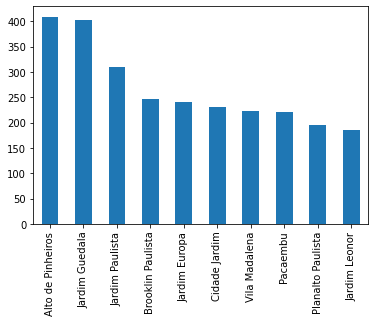

In [ ]:
n_imv_bairros = dados['Bairro'].value_counts()
n_imv_bairros.head(10).plot.bar()

# Desafios

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

### Desafio 01
Realizar a média da metragem para cara um dos bairros.

In [ ]:
dados.groupby('Bairro')[['Metragem']].mean()

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


Para tentar visualizar melhor os resultados resolvi plotar os dados em gráfico.

In [ ]:
# Biblioteca plotly express
import plotly.express as px

In [ ]:
met_bairros = dados.groupby('Bairro')[['Metragem']].mean()

fig = px.bar(met_bairros, y='Metragem')
fig.show()

O gráfico não ficou bom, mas mostrou um outliers. Resolvi explorar mais para  tentar conhecê-lo melhor.

In [ ]:
met_bairros.max()

Metragem    37000.0
dtype: float64

In [ ]:
dados[dados['Bairro'] == 'Sítio Represa']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


Legal, dando uma localizado no google deu para perceber ser uma área rural com granjas, conforme [este link](https://www.google.com/maps/@-23.8593123,-46.757944,3a,75y,192.03h,84.12t/data=!3m6!1e1!3m4!1sdyqJ2pBOyTynS26y2kQGBA!2e0!7i16384!8i8192) que leva ao google street.

### Desafio 02
2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas)


In [ ]:
dados[dados['Bairro'] == 'Sítio Represa']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


Essa forma já foi utilizado anteriormente, existem N formas para se obter o mesmo resultado. Por exemplo, usando o `.loc`.

In [ ]:
dados.loc[dados.Bairro == 'Vila Castelo']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4788,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,R$ 4.000.000


Outro valor único para amostragem.

### Desafio 03
Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão.

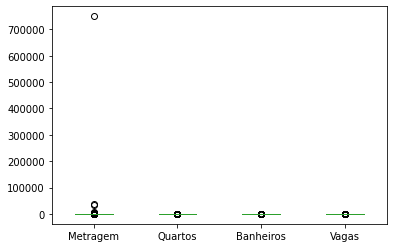

In [ ]:
# importar a biblioteca do matplotlib
import matplotlib.pyplot as plt

dados.plot.box()

O outlier atrapalhou a visualização, por isso vamos criar um df `dados_out` removendo os outlier.

In [ ]:
dados_out = dados.drop(6600)

In [ ]:
dados.loc[dados.Bairro == 'Sítio Represa']


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


In [ ]:
dados_out.loc[dados_out.Bairro == 'Sítio Represa']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor


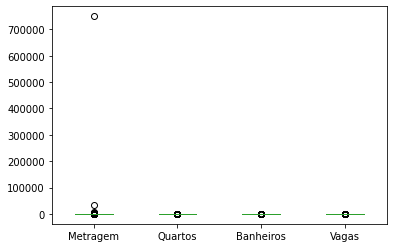

In [ ]:
dados_out.plot.box()

¬¬'  Não funcinou. Vamos remover metragem e relacionar apenas as outras váriaveis.

In [ ]:
filtro = dados.iloc[ : , 4:-1]

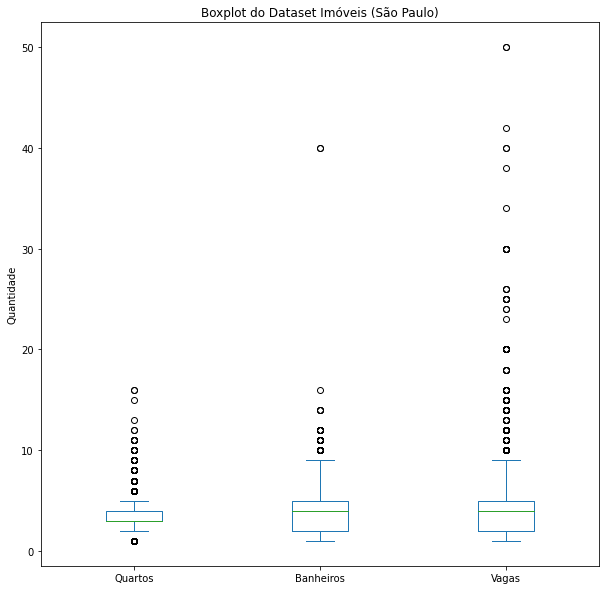

In [ ]:
filtro.plot.box(figsize=(10,10), title='Boxplot do Dataset Imóveis (São Paulo)', ylabel='Quantidade')

Tentar explorar melhore essas informações com o Plotly.



In [ ]:
qrt = dados['Quartos']
bnh = dados['Banheiros']
vg = dados['Vagas']

In [ ]:
import plotly.graph_objects as go

In [ ]:
trace0 = go.Box(
    y = qrt,
    name = 'quartos'
)

trace1 = go.Box(
    y = bnh,
    name = 'banheiros'
)

trace2 = go.Box(
    y = vg,
    name = 'vagas'
)

In [ ]:
data = [trace0, trace1, trace2]
layout = go.Layout(title = 'Boxplot do Dataset Imóveis (São Paulo)')

In [ ]:
fig = go.Figure(data = data, layout = layout)

In [ ]:
fig.show()

Dessa forma fica fácil perceber as nuances dos dados. Resta claro que a base registra imóveis dos mais diversos típos, como granjas, imóveis comerciais, pela análise dos outlier.

### Desafio 04
Pegar outros estatísticas dos dados, média, mediana, mim, max.

Um box plot é uma representação estatística da distribuição de uma variável através de seus quartis. As extremidades da caixa representam os quartis inferior e superior, enquanto a mediana (segundo quartil) é marcada por uma linha dentro da caixa, além disso os outliers podem ser plotados para estatísticas de mínimo e máximo.

Logo, pela propostas do exercício anterior já respondemos, mas vamos repetir essa etapa para o campo valores.

In [ ]:
vlr = dados['Valor']

In [ ]:
trace0 = go.Box(
    y = vlr,
    name = 'Valor'
)

In [ ]:
layout = go.Layout(title = 'Boxplot de Valores do Dataset Imóveis (São Paulo)')

In [ ]:
fig = go.Figure(data = trace0, layout = layout)

In [ ]:
fig.show()

Olha que interessante, alguns dos imóveis da base não são para venda, mas sim para aluguél, no futuro sera interessante separar esses imóveis.

### Desafio 05
Descobrir quais são os bairros que não tem nome de Rua.

Usando a função "isnull()" é possível retirar os bairros que possuem alguma rua sem nome, ou nulo. Organizando groupby para realizar a contagem temos apenas o nome dos bairros que não possuem rua.

In [ ]:
sem_rua = dados[["Bairro"]][dados["Rua"].isnull() == True]

In [ ]:
sem_rua.groupby(['Bairro']).count()

""
Bairro
Aclimação
Alto da Boa Vista
Alto da Lapa
Alto da Mooca
Alto de Pinheiros
...
Vila do Encontro
Água Branca
Água Fria
